In [2]:
#fake news and real news from fruad website
#predicting news is real or fake by creating robust model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re #remove stop words

from tensorflow.keras.preprocessing.text import Tokenizer  #for tokenization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score  #metrics
import seaborn as sns

plt.style.use('ggplot') #template/style for background for plots as ggplot

In [3]:
# reading given data
fake_df=pd.read_csv(r"C:\Users\ASUS\Desktop\Deep Learning\RNN\Project on RNN\Project on RNN\Dataset\Fake.csv")
real_df=pd.read_csv(r"C:\Users\ASUS\Desktop\Deep Learning\RNN\Project on RNN\Project on RNN\Dataset\True.csv")

In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
#checking null values
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
real_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
#we have applied unique function to varible of fake df both dfs has similar varibles
#to understand what are the unique subjects(topics of news they covered) in fake df and real df
fake_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [8]:
#unique values of subject is checked
real_df.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [9]:
#dropping unwanted variables
fake_df.drop(['date','subject'],axis=1,inplace=True)
real_df.drop(['date','subject'],axis=1,inplace=True)

In [10]:
#creating manual class of fake and real if fake it is 0 and if it is real it is 1
fake_df['class']=0
real_df['class']=1

In [11]:
real_df.head()

,title,text,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


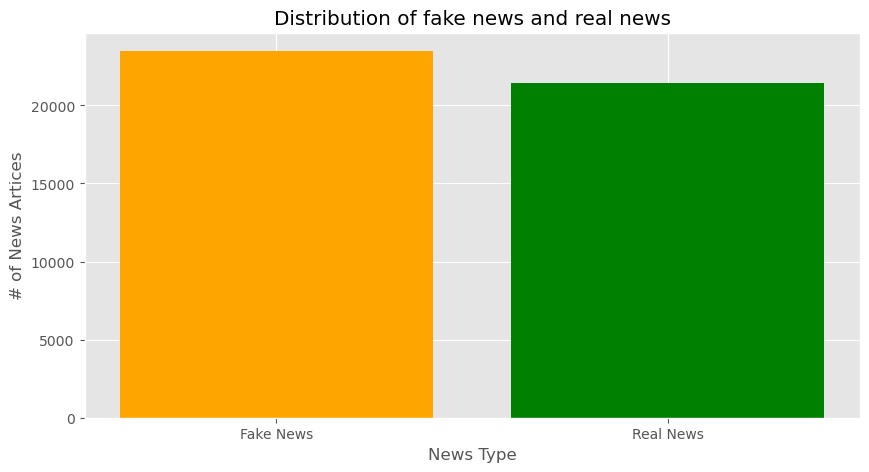

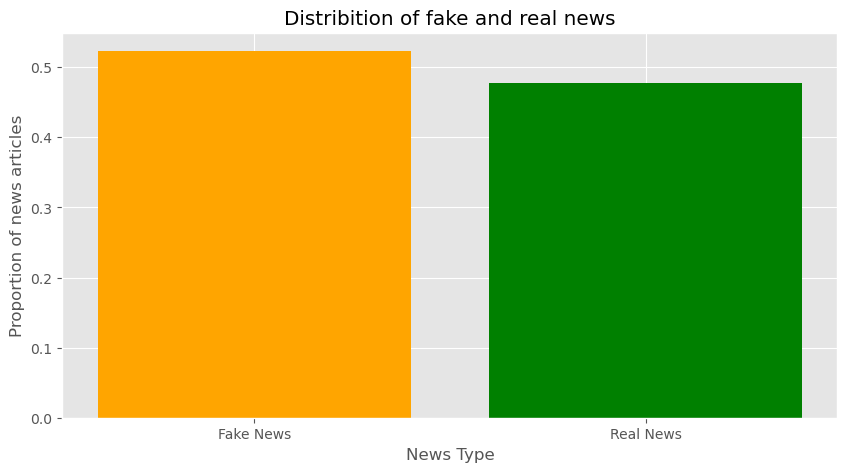

In [12]:
#plotting distrbution of fake news and real news in numbers
plt.figure(figsize=(10,5))
plt.bar('Fake News',len(fake_df),color='orange')
plt.bar('Real News',len(real_df),color='green')
plt.title('Distribution of fake news and real news')
plt.xlabel('News Type')
plt.ylabel('# of News Artices')
#plotting distrbution of fake news and real news in per
total_len=len(fake_df)+len(real_df)
plt.figure(figsize=(10,5))
plt.bar('Fake News', len(fake_df)/total_len,color='orange')
plt.bar('Real News',len(real_df)/total_len,color='green')
plt.title('Distribition of fake and real news')
plt.xlabel('News Type')
plt.ylabel('Proportion of news articles'
          )
plt.show()

In [13]:
#difference between articles of fake and real are 2064
print('Diff news articles',len(fake_df)-len(real_df))

Diff news articles 2064


In [14]:
#concatinating both fake and real df as one df as newsdf
news_df=pd.concat([fake_df,real_df],ignore_index=True,sort=False)
news_df.head()

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [15]:
#we merged both title column and text column under text column
news_df['text']=news_df['title']+news_df['text']
#droped extra col of title as it is merged already with title
news_df.drop('title',axis=1,inplace=True)

In [16]:
#splitting input variables and target variables and train and test sets
features=news_df['text']
targets=news_df['class']

X_train,X_test,y_train,y_test=train_test_split(features,targets,test_size=0.20,random_state=9)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(35918,) (8980,) (35918,) (8980,)


In [19]:
# performing normalization
#trying to remove unwanted charecters we have in our data
#taken help of re library
#we created a user defined function 
def normalize(data):
    normalized=[]
    for i in data:
        i=i.lower()       #converting all words to lower case
        i=re.sub('https?://\S+|www\.\S+','',i)    #urls are removed     
        i=re.sub('\\W',' ',i)     #non words and extra spaces
        i=re.sub('\n','',i)       #some words not matching with dict
        i=re.sub(' +',' ',i)
        i=re.sub('^ ','',i)
        i=re.sub(' $','',i)
        normalized.append(i)
    return normalized
#call function and apply normalization on train and test both gets normalized
X_train=normalize(X_train)
X_test=normalize(X_test)

In [24]:
X_train_subset = [row[:10] for row in X_train]
X_train_subset

['democrats ',
 'russia say',
 'trump urge',
 'lunatic gl',
 'only 25 of',
 'millennial',
 'china must',
 'breaking w',
 'frankfurt ',
 'vp candida',
 'watch what',
 'saudi prin',
 'we will no',
 'u s secret',
 'iraq 1991 ',
 'abortion e',
 'trump s ta',
 'trump advi',
 'spd agrees',
 'facebook u',
 'xi says ch',
 'ex u s att',
 'oops new e',
 'frightenin',
 'media trip',
 'boxing leg',
 'ag session',
 'breitbart ',
 'u s ally s',
 'justice de',
 'trump tout',
 'rough star',
 'watch cnn ',
 'after 8 ye',
 'watch maxi',
 'germany wo',
 'clinton wa',
 'in brussel',
 'ex rival s',
 'trump trie',
 'u s quits ',
 'melania tr',
 'boston bra',
 'even trump',
 'trump thre',
 'the baby p',
 'house spea',
 'british co',
 'fake bomb ',
 'strange tr',
 'republican',
 'democrats ',
 'u s to app',
 'exclusive ',
 'sec of sta',
 'eu ready t',
 'maine sena',
 'cnn clown ',
 'russia s h',
 'violent de',
 'congress a',
 'uk s may s',
 'watch sara',
 'brilliant ',
 'islamic st',
 'what s hil',
 'lie witn

In [18]:
#we created a variable max_vocab which we are assignig 10000
#we are creating btach of 10k words
max_vocab=10000
#applying tokenization and create batch of 10k words
#no of words is 10k
tokenizer=Tokenizer(num_words=max_vocab)
#now it is applied on train data
#tokenization step
tokenizer.fit_on_texts(X_train)

In [19]:
#converting text into integer format similar to dumm
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [20]:
#ensuring the different text we have in different observations they are of same length it is easy to process equal length text
#without dummy we can create pad some space and make it equal 
#padding is also a imp preprocessing step
#spacing is done for after text by giving parameter by padding=post
#length should not exceed 256
X_train=tf.keras.preprocessing.sequence.pad_sequences(X_train,padding='post',maxlen=256)
X_test=tf.keras.preprocessing.sequence.pad_sequences(X_test,padding='post',maxlen=256)

In [21]:
#cehcnking shape after pre processing
print(f"X_train :{X_train.shape} \nX_test :{X_test.shape}")

X_train :(35918, 256) 
X_test :(8980, 256)


In [24]:
#model buiding
#instentiating the sequential function using LSTM Model
#embedding=how many words to handle at a time
#specify lstm and provide on how many words model to work at a time we can give 2 power numebrs not necessary same number to be provided
#bidirection layer confuguring hidden layer
#processing main processing layer if there is need of back propagationa fter sending to next layer for allowing that we have given parameter
#if relevant layer is genrated it will go to next layer or else it comes back and optimizes 
#adding activation fucntion
#calling dropout fucntion control upto 50 per
#genrating output layer as 1
#summary is print
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,128),             
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(1e-4),
             metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_split=0.1,batch_size=30,shuffle=True,callbacks=[early_stop])

Epoch 1/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 158s 138ms/step - accuracy: 0.7345 - loss: 0.4259 - val_accuracy: 0.9847 - val_loss: 0.0578
Epoch 2/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.9896 - loss: 0.0443 - val_accuracy: 0.9908 - val_loss: 0.0357
Epoch 3/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 141s 131ms/step - accuracy: 0.9946 - loss: 0.0228 - val_accuracy: 0.9911 - val_loss: 0.0263
Epoch 4/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 142s 132ms/step - accuracy: 0.9981 - loss: 0.0109 - val_accuracy: 0.9914 - val_loss: 0.0274
Epoch 5/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 140s 130ms/step - accuracy: 0.9980 - loss: 0.0084 - val_accuracy: 0.9919 - val_loss: 0.0290


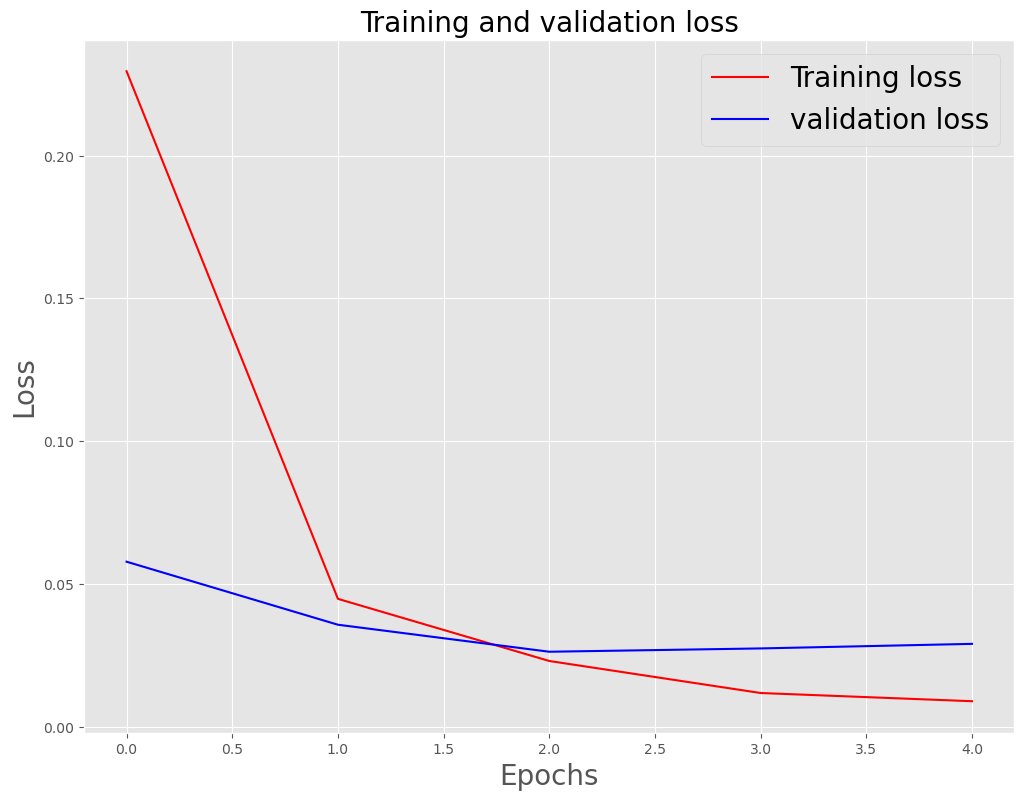

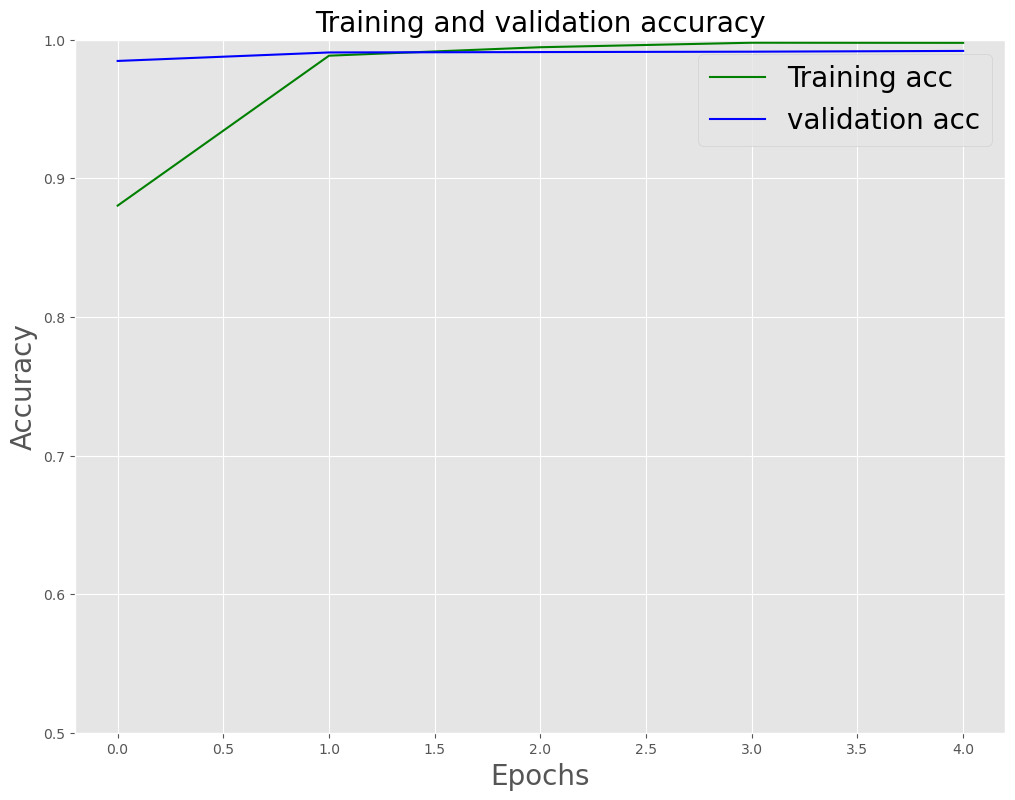

In [28]:
#plotting loss accuracy
history_dict=history.history
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=history.epoch
plt.figure(figsize=(12,9))
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss',size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel('Loss',size=20)
plt.legend(prop={'size':20})
plt.show()
plt.figure(figsize=(12,9))
plt.plot(epochs,acc,'g',label='Training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation accuracy',size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel('Accuracy',size=20)
plt.legend(prop={'size':20})
plt.ylim((0.5,1))
plt.show()

In [29]:
#evaljuated perfomrance of model onthe test set
#how the model is perfomring on xtest and ytest
model.evaluate(X_test,y_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9912 - loss: 0.0256


[0.027982844039797783, 0.9917594790458679]

In [31]:
#caluculating model's perfomrance on  x test and created a list
#model to predict positive and negative sentiments on x_tests and write into a file
pred=model.predict(X_test)
binary_prediction=[]
#grater than0.5 is real and less than 0.5 and  as 0 both to be added to list
for i in pred:
    if i>=0.5:
        binary_prediction.append(1)
    else:
        binary_prediction.append(0)   

281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step


In [33]:
#evaluating test accuracy, precision,recall score
print('Accuracy on testing set:',accuracy_score(binary_prediction,y_test))
print('Precision on testing set:',precision_score(binary_prediction,y_test))
print('recall on testing set:',recall_score(binary_prediction,y_test))

Accuracy on testing set: 0.9917594654788419
Precision on testing set: 0.9905224225612576
recall on testing set: 0.99235757295044


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

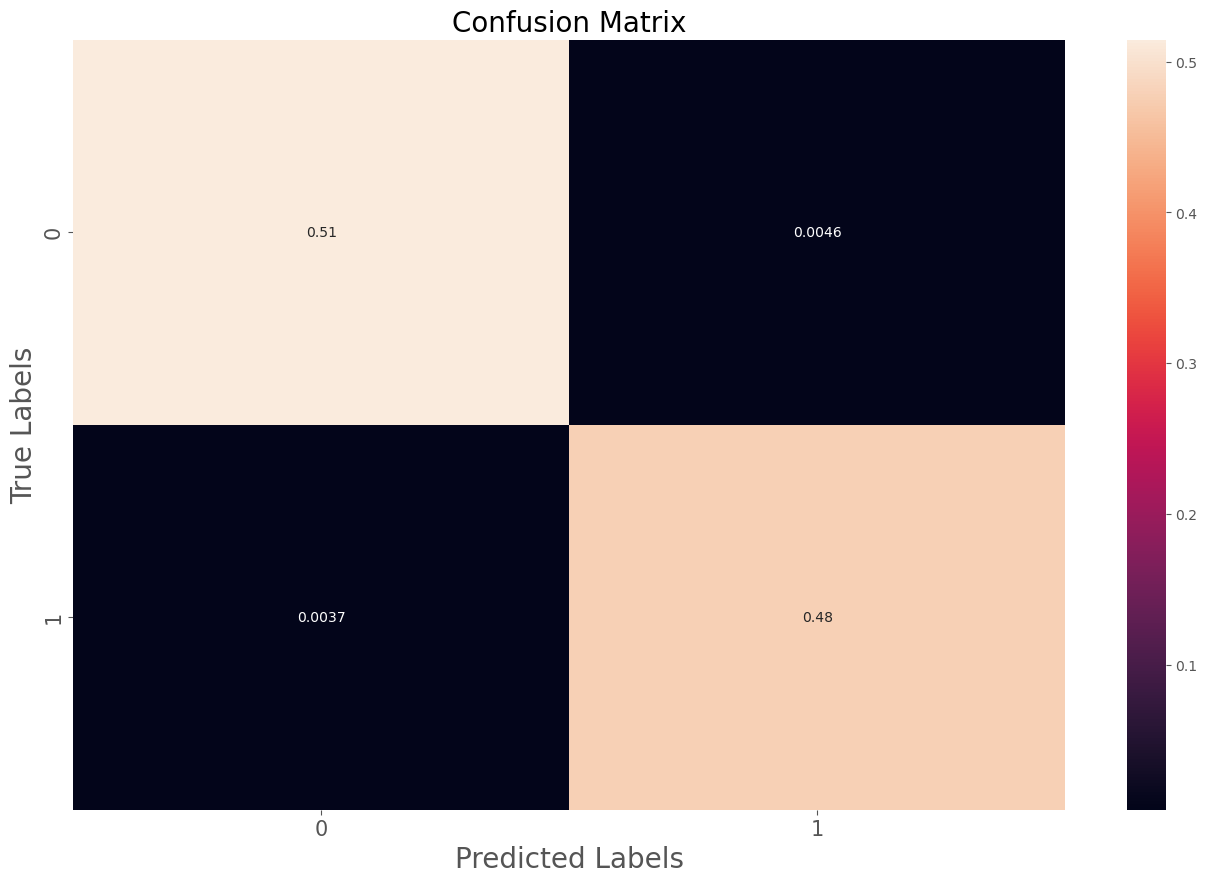

In [34]:
#confusion matrix
matrix=confusion_matrix(binary_prediction,y_test,normalize='all')
plt.figure(figsize=(16,10))
ax=plt.subplot()
sns.heatmap(matrix,annot=True,ax=ax)
ax.set_xlabel('Predicted Labels',size=20)
ax.set_ylabel('True Labels',size=20)
ax.set_title('Confusion Matrix',size=20)
ax.set_xlabel('Predicted Labels',size=20)
ax.xaxis.set_ticklabels([0,1],size=15)
ax.yaxis.set_ticklabels([0,1],size=15)


In [35]:
e=model.layers[0]
weights=e.get_weights()[0]
print(weights.shape)

(10000, 128)


In [36]:
word_index=list(tokenizer.word_index.keys())
word_index=word_index[:max_vocab-1]

In [37]:
import io
out_v=io.open('fakenews_vecs.tsv','w',encoding='utf-8')
out_m=io.open('fakenews_meta.tsv','w',encoding='utf-8')
for num,word in enumerate(word_index):
    vec=weights[num+1]
    out_m.write(word+ "\n")
    out_v.write('\t'.join([str(x) for x in vec])+"\n")
out_v.close()
out_m.close()